In [5]:
import os
import requests as req
import pandas as pd

In [33]:
IRIS_FILE = req.get('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data')

In [36]:
with open(os.getcwd() + '/iris.data', 'w') as fw_iris:
    fw_iris.write(IRIS_FILE.text)

In [6]:
IRIS_DF = pd.read_csv(os.getcwd() + '/iris.data', names=['sepal length', 'sepal width', 'petal length', 'petal width', 'class'])

In [7]:
virginica = IRIS_DF[(IRIS_DF['class'] == 'Iris-virginica') & (IRIS_DF['petal width'] > 2.2)].reset_index()

In [8]:
virginica

,index,sepal length,sepal width,petal length,petal width,class
0,100,6.3,3.3,6.0,2.5,Iris-virginica
1,109,7.2,3.6,6.1,2.5,Iris-virginica
2,114,5.8,2.8,5.1,2.4,Iris-virginica
3,115,6.4,3.2,5.3,2.3,Iris-virginica
4,118,7.7,2.6,6.9,2.3,Iris-virginica
5,120,6.9,3.2,5.7,2.3,Iris-virginica
6,135,7.7,3.0,6.1,2.3,Iris-virginica
7,136,6.3,3.4,5.6,2.4,Iris-virginica
8,140,6.7,3.1,5.6,2.4,Iris-virginica
9,141,6.9,3.1,5.1,2.3,Iris-virginica


In [9]:
virginica.describe()

,index,sepal length,sepal width,petal length,petal width
count,14.000000,14.000000,14.000000,14.000000,14.000000
mean,129.142857,6.735714,3.157143,5.692857,2.364286
std,15.815558,0.540096,0.256348,0.490626,0.084190
min,100.000000,5.800000,2.600000,5.100000,2.300000
25%,115.750000,6.325000,3.025000,5.325000,2.300000
50%,135.500000,6.700000,3.200000,5.650000,2.300000
75%,142.500000,6.900000,3.300000,5.975000,2.400000
max,148.000000,7.700000,3.600000,6.900000,2.500000


In [10]:
virginica.corr()

,index,sepal length,sepal width,petal length,petal width
index,1.000000,0.035378,0.033881,-0.325017,-0.382942
sepal length,0.035378,1.000000,-0.254779,0.706446,-0.240465
sepal width,0.033881,-0.254779,1.000000,-0.173872,0.458260
petal length,-0.325017,0.706446,-0.173872,1.000000,0.123709
petal width,-0.382942,-0.240465,0.458260,0.123709,1.000000


In [15]:
import matplotlib.pyplot as plt

In [16]:
plt.style.use('ggplot')

In [17]:
%matplotlib inline

In [18]:
import numpy as np

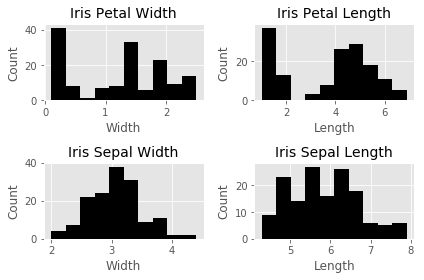

In [20]:
fig, ax = plt.subplots(2, 2, figsize=(6, 4))
ax[0][0].hist(IRIS_DF['petal width'], color='black')
ax[0][0].set_ylabel('Count', fontsize=12)
ax[0][0].set_xlabel('Width', fontsize=12)
ax[0][0].set_title('Iris Petal Width', fontsize=14, y=1.01)
ax[0][1].hist(IRIS_DF['petal length'], color='black')
ax[0][1].set_ylabel('Count', fontsize=12)
ax[0][1].set_xlabel('Length', fontsize=12)
ax[0][1].set_title('Iris Petal Length', fontsize=14, y=1.01)
ax[1][0].hist(IRIS_DF['sepal width'], color='black')
ax[1][0].set_ylabel('Count', fontsize=12)
ax[1][0].set_xlabel('Width', fontsize=12)
ax[1][0].set_title('Iris Sepal Width', fontsize=14, y=1.01)
ax[1][1].hist(IRIS_DF['sepal length'], color='black')
ax[1][1].set_ylabel('Count', fontsize=12)
ax[1][1].set_xlabel('Length', fontsize=12)
ax[1][1].set_title('Iris Sepal Length', fontsize=14, y=1.01)
plt.tight_layout()

Text(0.5,1,'Petal Scatterplot')

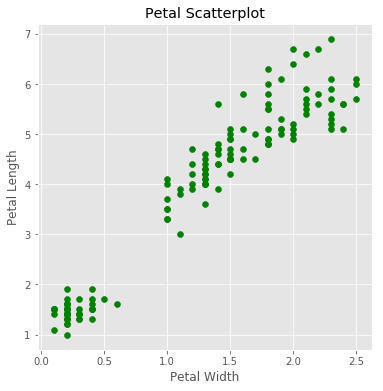

In [21]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(IRIS_DF['petal width'], IRIS_DF['petal length'], color='green')
ax.set_xlabel('Petal Width')
ax.set_ylabel('Petal Length')
ax.set_title('Petal Scatterplot')

Text(0.5,1,'Petal Length Plot')

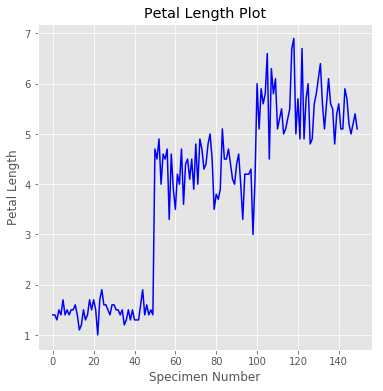

In [23]:
fig, ax = plt.subplots(figsize=(6,6))
ax.plot(IRIS_DF['petal length'], color='blue')
ax.set_xlabel('Specimen Number')
ax.set_ylabel('Petal Length')
ax.set_title('Petal Length Plot')

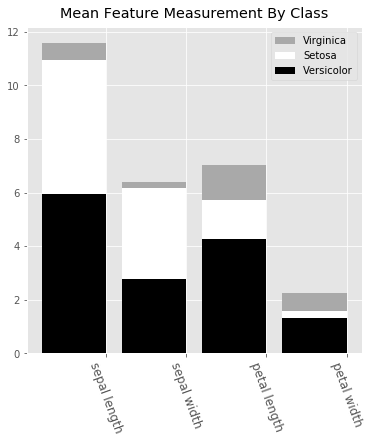

In [24]:
fig, ax = plt.subplots(figsize=(6,6))
bar_width = .8
labels = [x for x in IRIS_DF.columns if 'length' in x or 'width' in x]
ver_y = [IRIS_DF[IRIS_DF['class']=='Iris-versicolor'][x].mean() for x in
labels]
vir_y = [IRIS_DF[IRIS_DF['class']=='Iris-virginica'][x].mean() for x in
labels]
set_y = [IRIS_DF[IRIS_DF['class']=='Iris-setosa'][x].mean() for x in labels]
x = np.arange(len(labels))
ax.bar(x, vir_y, bar_width, bottom=set_y, color='darkgrey')
ax.bar(x, set_y, bar_width, bottom=ver_y, color='white')
ax.bar(x, ver_y, bar_width, color='black')
ax.set_xticks(x + (bar_width/2))
ax.set_xticklabels(labels, rotation=-70, fontsize=12);
ax.set_title('Mean Feature Measurement By Class', y=1.01)
ax.legend(['Virginica','Setosa','Versicolor'])

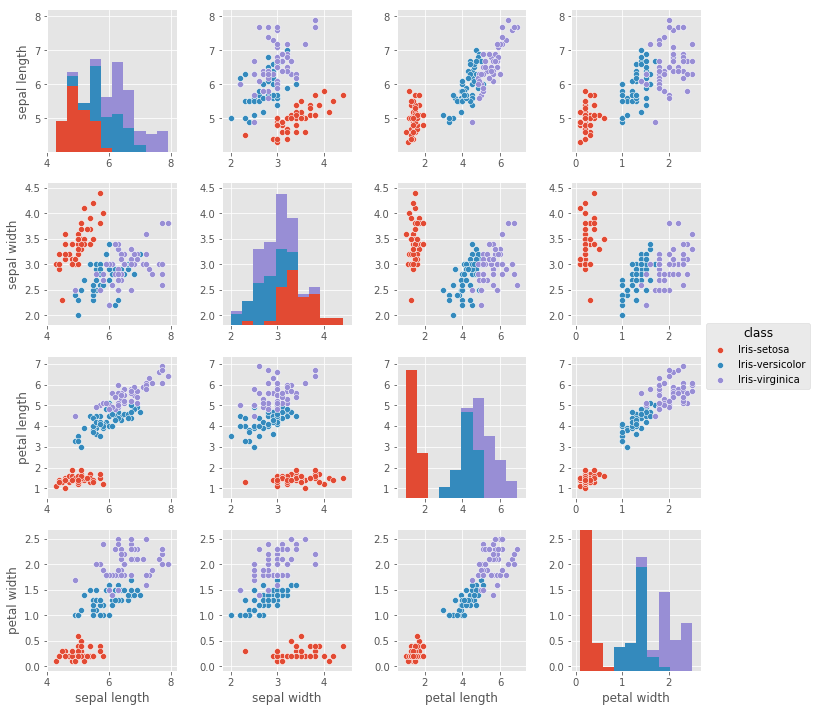

In [25]:
import seaborn as sns
sns.pairplot(IRIS_DF, hue='class')

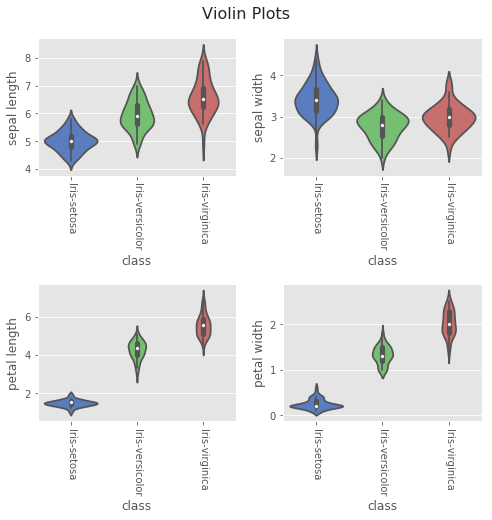

In [26]:
fig, ax = plt.subplots(2, 2, figsize=(7, 7))
sns.set(style='white', palette='muted')
sns.violinplot(x=IRIS_DF['class'], y=IRIS_DF['sepal length'], ax=ax[0,0])
sns.violinplot(x=IRIS_DF['class'], y=IRIS_DF['sepal width'], ax=ax[0,1])
sns.violinplot(x=IRIS_DF['class'], y=IRIS_DF['petal length'], ax=ax[1,0])
sns.violinplot(x=IRIS_DF['class'], y=IRIS_DF['petal width'], ax=ax[1,1])
fig.suptitle('Violin Plots', fontsize=16, y=1.03)
for i in ax.flat:
    plt.setp(i.get_xticklabels(), rotation=-90)
    fig.tight_layout()